In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')








In [ ]:
#debug, this is not generating line on chart
import os
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import fredpy as fp

series_ids = ['NETFI','IEABC']

fp.api_key = fp.load_api_key('cucumber.txt')

# Initialize the FRED API client
fred = Fred(api_key=fp.api_key)

# Define the series IDs we want to use
ca_id = 'NETFI'
ka_id = 'IEABC'

# Define the start and end dates for the data
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

# Get the data for the series
ca_data = fred.get_series(series_ids[0], start_date, end_date)
ka_data = fred.get_series(series_ids[1], start_date, end_date)

# Combine the data into a dataframe
data = pd.concat([ca_data, ka_data], axis=1)
data.columns = ['Current Account', 'Capital Account']

# Define the plot style
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the title and axis labels
ax.set_title('US Current and Capital Accounts Last 20 Years', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')

# Plot the lines
data.plot(ax=ax)

# Set the y-axis limits
ax.set_ylim(-500, 500)

# Set the x-axis limits
ax.set_xlim(data.index[0], data.index[-1])

# Show the plot
plt.show()


In [ ]:
#these following two lines drive me crazi- one plots the line and the other doesn't
import os
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import fredpy as fp

series_ids = ['NETFI','IEABC']

fp.api_key = fp.load_api_key('cucumber.txt')

# Initialize the FRED API client
fred = Fred(api_key=fp.api_key)

# Define the series IDs we want to use
ca_id = 'W167RC1Q027SBEA'
ka_id = 'IEABC'

# Define the start and end dates for the data
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

# Get the data for the series
ca_data = fred.get_series(series_ids[0], start_date, end_date)
ka_data = fred.get_series(series_ids[1], start_date, end_date)

# Combine the data into a dataframe
data = pd.concat([ca_data, ka_data], axis=1)
data.columns = ['Current Account', 'Capital Account']

# Define the plot style
plt.style.use('fivethirtyeight')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the title and axis labels
ax.set_title('US Current and Capital Accounts Last 20 Years', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')

# Plot the lines
data.plot(ax=ax)

# Set the y-axis limits
ax.set_ylim(-1500, 200)

# Show the plot
plt.show()


In [ ]:
#regular line chart, working
import os
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import fredpy as fp

series_ids = ['NETFI','IEABC']

fp.api_key = fp.load_api_key('cucumber.txt')

# Initialize the FRED API client
fred = Fred(api_key=fp.api_key)

# Define the series IDs we want to use
ca_id = 'NETFI'
ka_id = 'IEABC'

# Define the start and end dates for the data
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(years=20)).strftime('%Y-%m-%d')

# Get the data for the series
ca_data = fred.get_series(series_ids[0], start_date, end_date)
ka_data = fred.get_series(series_ids[1], start_date, end_date)

# Combine the data into a dataframe
data = pd.concat([ca_data, ka_data], axis=1)
data.columns = ['Current Account', 'Capital Account']

# Define the plot style
plt.style.use('seaborn')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the title and axis labels
ax.set_title('US Current and Capital Accounts Last 20 Years', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')

# Plot the lines
data.plot(ax=ax)

# Show the plot
plt.show()


TypeError: no numeric data to plot

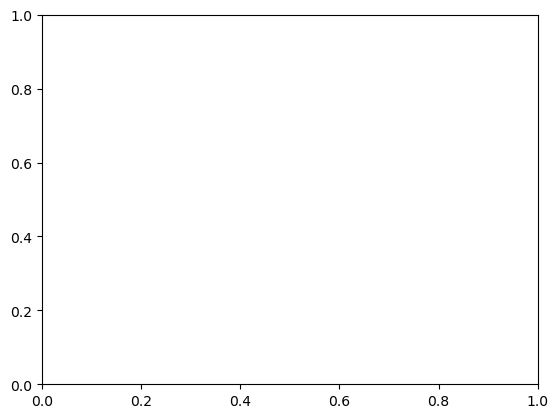

In [7]:
import fredpy as fp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set up the FRED API key
fp.api_key = fp.load_api_key('cucumber.txt')


# Define the series IDs we want to fetch
series_ids = ['IORB']

# Fetch the data and create the dataframes
data = pd.Series(fp.series(series_ids))
df = pd.DataFrame(data)

# Create the figure and axis for the chart
fig, ax = plt.subplots()
df.plot(ax=ax)

# Set the title and axis labels
ax.set_title('US Economic Indicators')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Show the legend at the bottom
ax.legend(loc='lower center', ncol=len(df.columns))

# Show the chart
plt.show()

In [ ]:
import fredapi
import pandas as pd
from datetime import datetime, timedelta
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')


# Set up the FRED API client
fred = Fred(api_key=fp.api_key)

# Set up the date ranges
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Get the data from FRED
data = fred.get_series('OBFRVOL', start_date, end_date)

# Convert the data to a dataframe
df = pd.DataFrame(data, columns=['Balance of Payments'])

# Print the dataframe
print(df)


In [ ]:
df.to_csv("BOP.csv")

In [ ]:
#Tough to compute a function that iterates over a million series IDs!
import pandas as pd
from fredapi import Fred

# Set up the FRED API key
fp.api_key = fp.load_api_key('cucumber.txt')

fred = Fred(api_key=fp.api_key)

def get_latest_series():
    # Retrieve the 100 most recently updated series
    latest_series = fred.get_series(sort_order='desc', order_by='observation_end', limit=25)

    # Get the 25 most recent series by observation end date
    latest_series = latest_series.sort_values(by='observation_end', ascending=False).head(25)

    # Return the list of series IDs
    return latest_series.index.tolist()
get_latest_series()

In [ ]:
#this code creates a fill_between chart 

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from fredapi import Fred
import fredpy as fp

fp.api_key = fp.load_api_key('cucumber.txt')

#api_key = fp.api_key

def animate_mortgage30us(api_key):
    # Initialize FRED API client
    fred = Fred(api_key=api_key)

    # Fetch data for MORTGAGE30US series
    data = fred.get_series('MORTGAGE30US')

    # Create figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim([data.index[0], data.index[-1]])
    ax.set_ylim([data.min(), data.max()])

    # Create line and fill between objects
    line, = ax.plot([], [])
    fill = ax.fill_between(data.index, data, color='blue', alpha=0.2)

    # Define update function for animation
    def update(i):
        line.set_data(data[:i].index, data[:i].values)
        return (line,)

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(data), interval=100, blit=True)

    # Show plot
    plt.show()
animate_mortgage30us(api_key)

In [ ]:
#retrieves xlm series ids and generates a document to analyze
import requests
import xml.etree.ElementTree as ET
import fredpy as fp

# Set API key and search text
fp.api_key = fp.load_api_key('cucumber.txt')

#api_key = str("bb93e6af041f1b12ceef4f949f5abd4d")
search_text = "interest rate policy"

# Build URL for API call
url = f"https://api.stlouisfed.org/fred/series/search?search_text={search_text}&api_key={api_key}"

# Send GET request to API endpoint
response = requests.get(url)

# Parse response XML into ElementTree object
root = ET.fromstring(response.content)

# Print XML tree to console
ET.dump(root)
# Save XML response to file
with open("fred_search_results2.xml", "wb") as f:
    f.write(response.content)


In [6]:
import fredpy as fp

api_key = fp.load_api_key('cucumber.txt')



# Function using fredapi
def test_fredapi(api_key):
    from fredapi import Fred

    # Initialize FRED API client
    fred = Fred(api_key=api_key)

    try:
        # Test API call by fetching series data for GDP
        data = fred.get_series("GDP")
        print(f"API access using fredapi successful. Fetched {len(data)} observations for GDP series.")
        return True
    except Exception as e:
        print(f"API access using fredapi failed with exception: {e}")
        return False

#Function using Fredpy
def test_fredpy(api_key):
    import fredapi

    # Initialize FRED API client
    fred = fredapi.Fred(api_key=api_key)

    try:
        # Test API call by fetching series data for GDP
        data = fred.get_series("GDP")
        data.to_csv("successfullscreen.txt")
        print(f"API access using fredpy successful. Fetched {len(data)} observations for GDP series.")
        return True
    except Exception as e:
        print(f"API access using fredpy failed with exception: {e}")
        return False


    
test_fredapi(api_key)
test_fredpy(api_key)

API access using fredapi successful. Fetched 310 observations for GDP series.
API access using fredpy successful. Fetched 310 observations for GDP series.


True

In [ ]:
data.to_csv("results.csv")